## Import

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Corrigir a base de dados Penguins

In [3]:
#Carregando base de dados
penguins = sns.load_dataset('penguins')

np.random.seed(42)  #Definindo seed do random para replicabilidade

#Removendo valores
removidos = set()
porcentagem = 0.30 #Porcentagem (0~1) das células a serem removidas
qtdCelulas = len(penguins)*(len(penguins.columns)) #Quantidade de células na base de dados, ignorando a última coluna

for i in range(int(np.ceil(porcentagem*qtdCelulas))):
  linha = np.random.randint(0, len(penguins))
  coluna = np.random.randint(0, len(penguins.columns))
  while (linha, coluna) in removidos:
    linha = np.random.randint(0, len(penguins))
    coluna = np.random.randint(0, len(penguins.columns))

  penguins.iloc[linha, coluna] = np.nan
  removidos.add((linha,coluna))

penguins.info()
print("\n\nForam removidas ",str(len(removidos)), "células das ",str(qtdCelulas))
del removidos
del qtdCelulas
del porcentagem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            232 non-null    object 
 1   island             241 non-null    object 
 2   bill_length_mm     233 non-null    float64
 3   bill_depth_mm      244 non-null    float64
 4   flipper_length_mm  247 non-null    float64
 5   body_mass_g        240 non-null    float64
 6   sex                235 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Foram removidas  723 células das  2408


 ## Dashboard com penguins faltantes

#### gráfico de disperção das espécies especificando por comprimento do bico e profundidade do bico

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

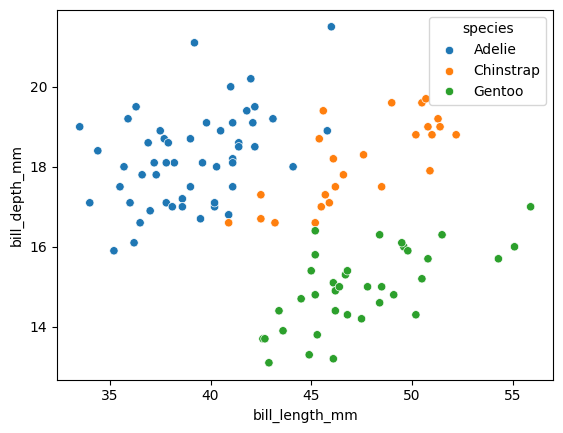

In [4]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

#### gráfico de disperção das espécies especificando por comprimento do bico e tamanho de nadadeira

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

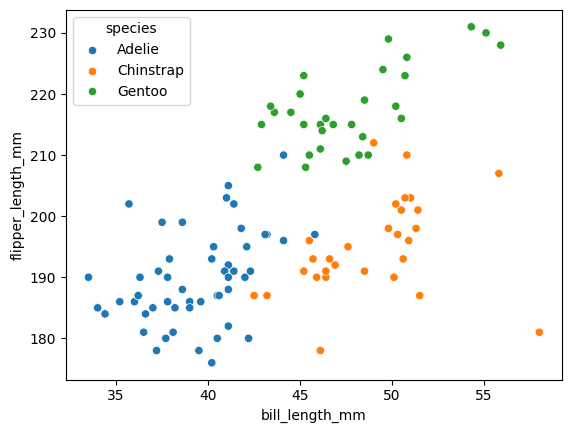

In [6]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='species')

#### gráfico de histograma especificando a contagem de penguins por ilha

<Axes: xlabel='island', ylabel='Count'>

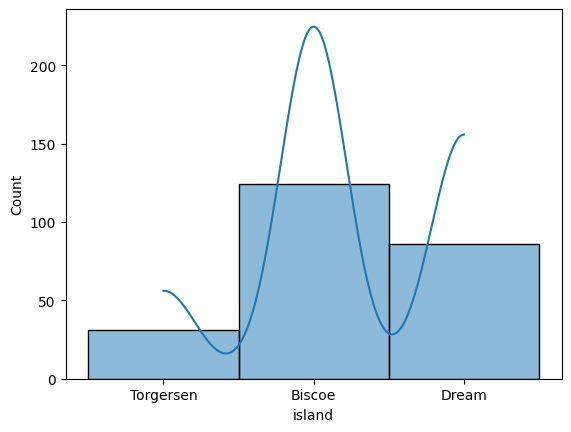

In [8]:
sns.histplot(penguins['island'], kde=True)

#### gráfico de histograma especificando a contagem de penguins por espécie

<Axes: xlabel='species', ylabel='Count'>

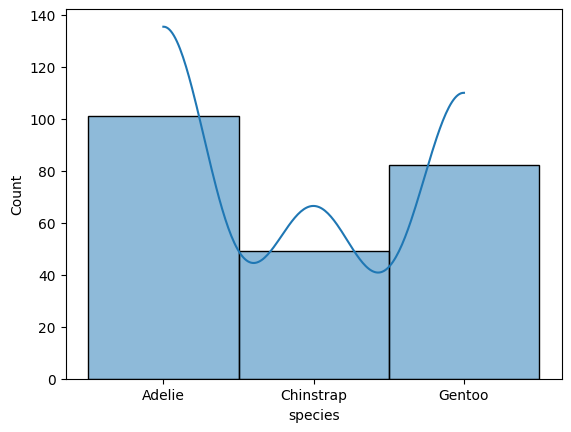

In [9]:
sns.histplot(penguins['species'], kde=True)